In [1]:
import sys
sys.path.insert(1, '/home/nicolas/code/src')
sys.path.insert(1, '/home/nicolas/code/data')


import torch
import h5py
import matplotlib.pyplot as plt
import numpy as np
from RBM import GBRBM

In [17]:
fname = 'data/MNIST__GBRBM_NGibbs50_Nh500_Ns10000_Nmb500_var_set_reg_100_x1_lr_0.01.h5'
fmname="model/AllParametersGBRBM_NGibbs_MNIST_50_Nh500_Ns10000_Nmb500_var_set_reg_100_x1_lr_0.01.h5"
fm = h5py.File(fmname, 'r')
f = h5py.File(fname,'r')
alltime = f['alltime']

In [18]:
var =[]
for t in np.array(alltime):
    var.append(np.array(f['varIT'+str(t)])[:,0])
var = np.array(var)

KeyError: "Unable to open object (object 'varIT0' doesn't exist)"

(0.0, 2.0)

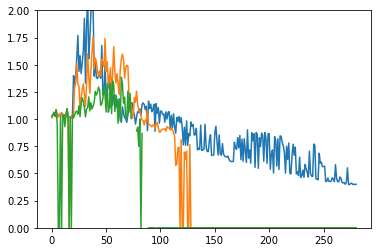

In [13]:
plt.plot(var[:,0])
plt.plot(var[:,1])
plt.plot(var[:,2])
plt.ylim(top = 2, bottom = 0)


In [20]:
si = torch.tensor(f['dataIT'+str(t)], device = torch.device("cuda"))

RuntimeError: CUDA error: CUBLAS_STATUS_INVALID_VALUE when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

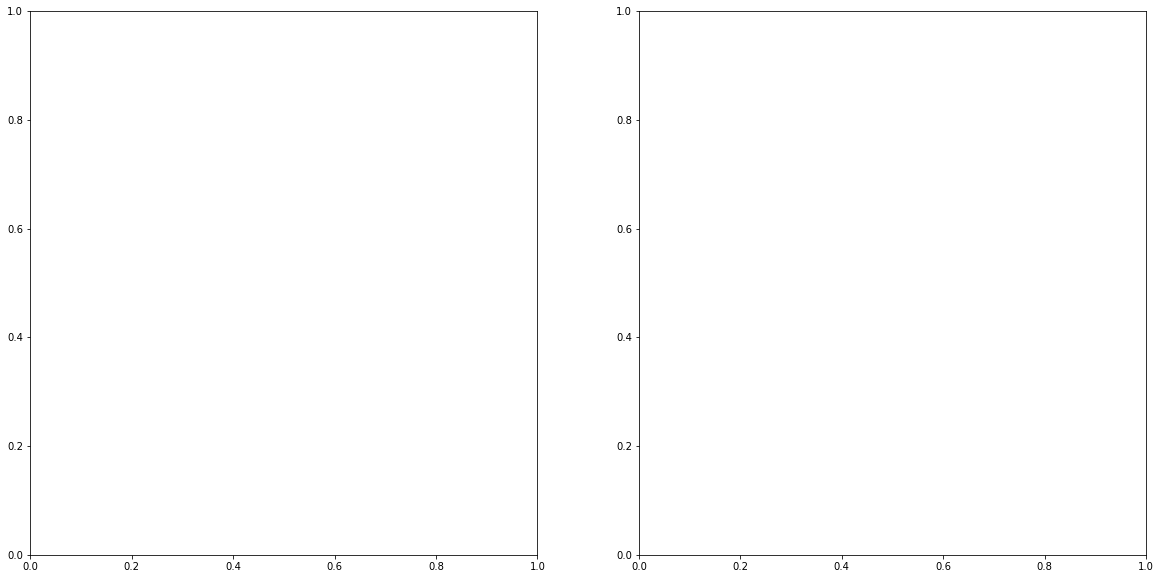

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
W_1 = torch.tensor(fm['W_1'+str(t)], device=torch.device("cuda"))
_, _, V = torch.svd(W_1)
X = torch.load("data/data_gen_GBRBM_ana.pt")
proj = torch.matmul(X.T, V)
proj_gen = torch.matmul(si.T, V)
# scatter plot des données générées
ax1.scatter(proj[:, 0].cpu(), proj[:, 1].cpu(), label="Training data")
ax1.scatter(proj_gen[:, 0].cpu(), proj_gen[:, 1].cpu(),
            alpha=0.7, label="Generated data")
ax1.set_title("First principal plane")
ax1.legend()
ax2.scatter(proj[:, 2].cpu(), proj[:, 3].cpu(), label="Training data")
ax2.scatter(proj_gen[:, 2].cpu(), proj_gen[:, 3].cpu(),
            alpha=0.7, label="Generated data")
ax2.set_title("Second principal plane")
ax2.legend()


In [27]:
i = 0

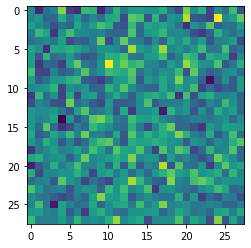

In [44]:
plt.imshow(si[:,i].view(28,28).cpu()) 
i+=1

In [4]:
X = torch.load("../dataset/yeast.pt")
fname = "../model/GBRBM/YEAST/AllParametersGBRBM_NGibbs_YEAST_10_Nh100_Ns10000_Nmb100_var_set_reg_100_x1_lr_0.01.h5"
f = h5py.File(fname, 'r')
alltime = np.array(f['alltime'])
alltime = []
for t in f['alltime'][:]:
    if 'W_1'+str(t) in f:
        alltime.append(t)
device = torch.device("cpu")

In [5]:
myRBM = GBRBM(num_visible=X.shape[0],
                   num_hidden=100,
                   device=device,
                   lr_W1=0.01,
                   lr_W2=1e-4,
                   gibbs_steps=10,
                   UpdCentered=False,
                   mb_s=50,
                   num_pcd=50,
                   var_set = True)
vinit = torch.normal(torch.zeros((myRBM.Nv,1000), device=myRBM.device, dtype=myRBM.dtype))

alls = []
base = 1.7
v = np.array([0,1],dtype=int)
for k in range(30):
    v = np.append(v,int(base**k))

    
    
for t in v:
    at = np.abs(alltime-t)
    idx = np.argmin(at)
    t2 = alltime[idx]
    print(t, t2)
    myRBM.W_1 = torch.tensor(f['W_1'+str(t2)], device = myRBM.device)
    myRBM.W_2 = torch.tensor(f['W_2'+str(t2)], device = myRBM.device)
    
    myRBM.vbias = torch.tensor(f['vbias'+str(t2)], device = myRBM.device)
    myRBM.hbias = torch.tensor(f['hbias'+str(t2)], device = myRBM.device)    
    si,mi,_,_ = myRBM.Sampling(vinit,it_mcmc=10)#,anneal_steps=0)
    alls.append(np.linalg.svd(si/1000**0.5)[1])
si

0 0
1 1
1 1
1 1
2 2
4 4
8 8
14 14
24 24
41 41
69 69
118 118
201 201
342 342
582 582
990 990
1683 1683
2862 2862
4866 4866
8272 8272
14063 14063
23907 23907
40642 40642
69091 69091
117456 73957
199675 73957
339448 73957
577062 73957
981006 73957
1667711 73957
2835109 73957
4819685 73957


tensor([[ 0.5178,  0.6707,  0.4332,  ...,  0.5111,  0.3902,  0.3292],
        [-0.0220,  0.0308,  0.0734,  ..., -0.0780,  0.1386, -0.1898],
        [ 0.4007,  0.2761,  0.5282,  ..., -0.0556, -0.1003,  0.5493],
        ...,
        [-0.2214, -0.2005, -0.4432,  ..., -0.4577,  0.0360, -0.1109],
        [ 1.1706,  0.1153, -0.2840,  ...,  0.2839, -0.5865, -1.0725],
        [ 1.2095,  0.1543, -0.3278,  ..., -0.6601, -1.1288, -0.1973]])

(0.1, 10)

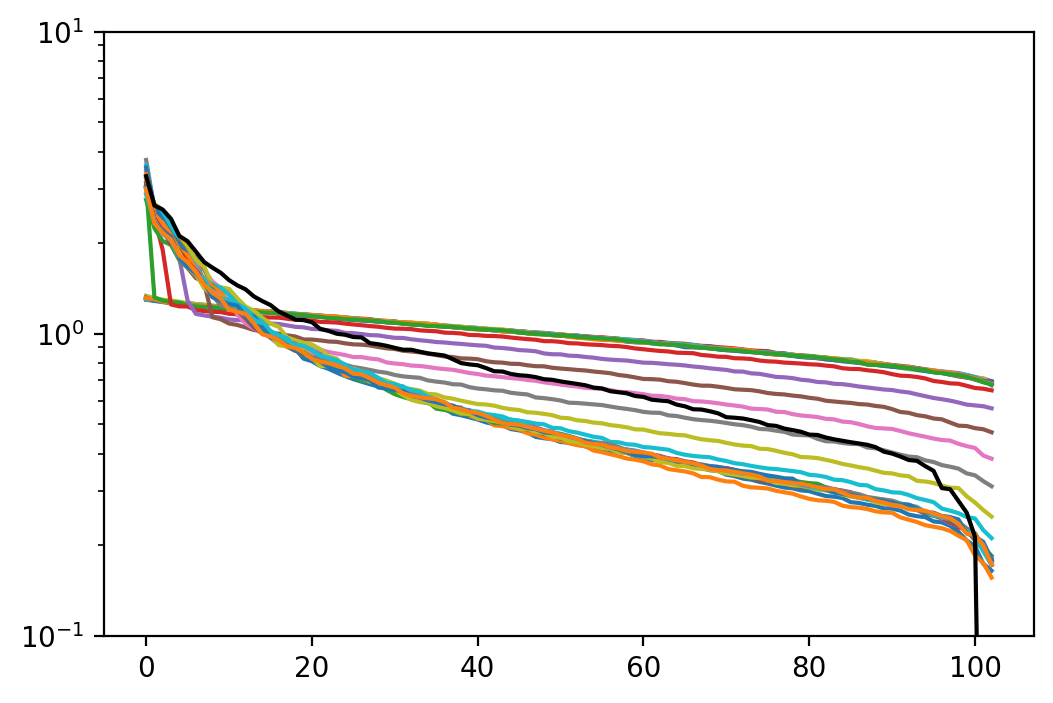

In [8]:
plt.figure(dpi=200)
for t in range(len(alls)):
    plt.plot(alls[t])
plt.semilogy(np.linalg.svd(newX/1000**0.5)[1],color='black')
plt.ylim(0.1,10)

In [6]:
si.shape

torch.Size([103, 1000])

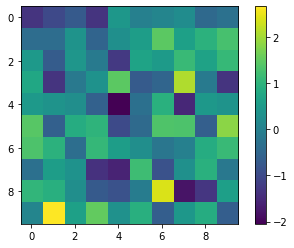

In [28]:
plt.imshow(si[:100,0].reshape(10,10))
plt.colorbar()

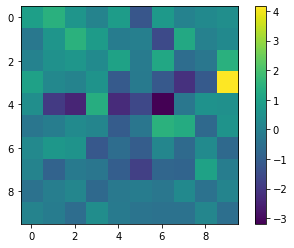

In [29]:
plt.imshow(X[:100,0].reshape(10,10))
plt.colorbar()

In [7]:
newX = X[:,:1000]

In [31]:
newX.shape

(103, 1000)

[]

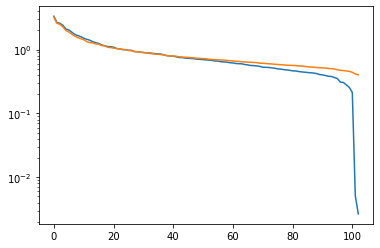

In [25]:
plt.plot(np.linalg.svd(newX/1000**0.5)[1])
plt.plot(np.linalg.svd(si/1000**0.5)[1])
plt.semilogy()

In [55]:
u,s,v = torch.svd(myRBM.W_1)

In [52]:
v.shape
Xsc = torch.mm(torch.tensor(X[:,:1000]).float().t(),v)
Ssc = torch.mm(torch.tensor(si[:,:1000]).float().t(),v)

<ipython-input-52-31a61364f34e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ssc = torch.mm(torch.tensor(si[:,:1000]).float().t(),v)


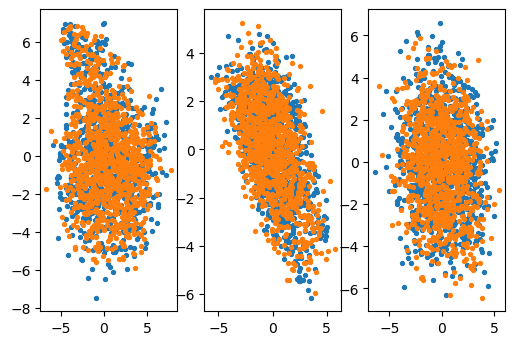

In [64]:
f,ax=plt.subplots(1,3,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=8)
ax[0].scatter(Ssc[:,0],Ssc[:,1],s=8)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=8)
ax[1].scatter(Ssc[:,2],Ssc[:,3],s=8)
ax[2].scatter(Xsc[:,4],Xsc[:,5],s=8)
ax[2].scatter(Ssc[:,4],Ssc[:,5],s=8)

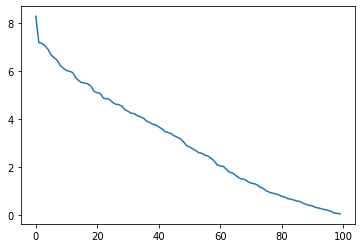

In [56]:
plt.plot(s)

In [65]:
%run src/plot_metric_classifier.py

In [15]:
fname = "../data/TMC_IT_100_90.h5"
f = h5py.File(fname, 'r')
proj_data = np.array(f['proj_data'])
y = np.array(f['y'])
p_m = np.array(f['p_m'])
w_hat = np.array(f['w_hat'])

In [16]:
x = w_hat[20:120]

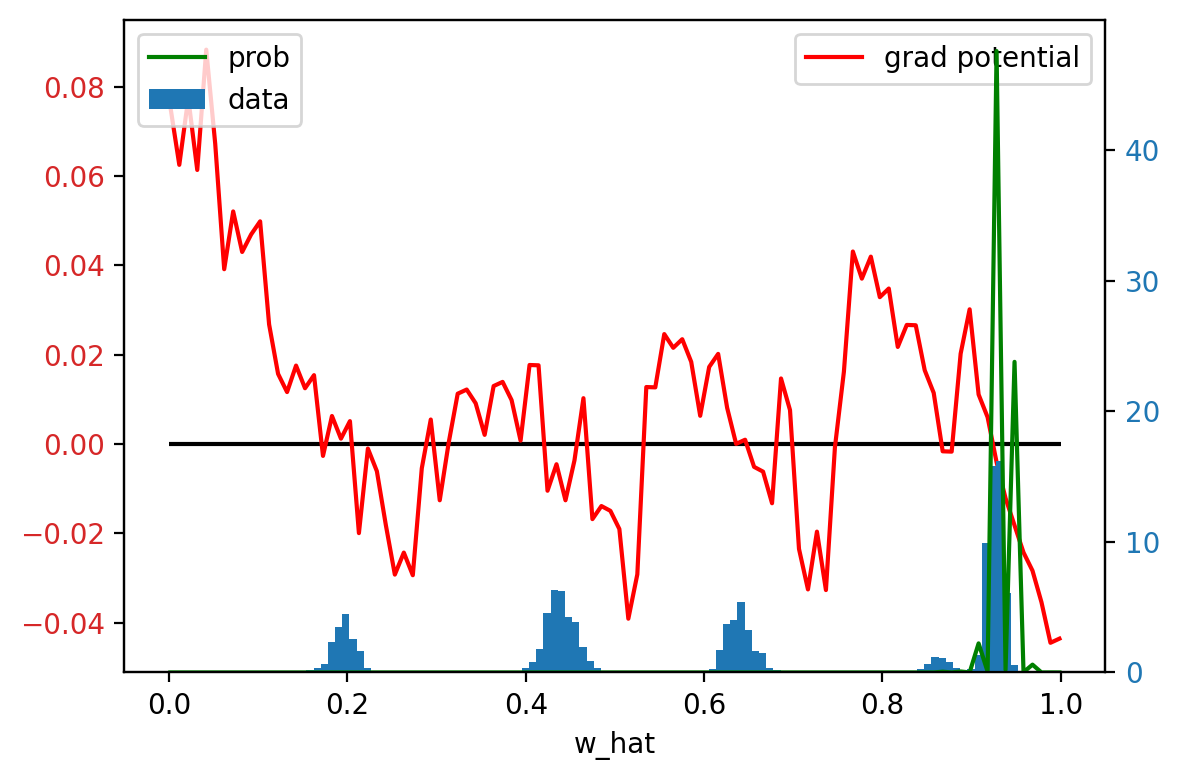

In [17]:
fig, ax1 = plt.subplots(dpi=200)
color = 'tab:red'
ax1.set_xlabel("w_hat")
#ax1.set_ylabel('exp', color=color)
ax1.plot(x, (y-w_hat)[20:120], color='red', label="grad potential")
ax1.hlines(0, 0, 1, color='black')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.hist(proj_data[:, 0], label='data', density=True, bins=100)
ax2.plot(w_hat[20:120], p_m[19:119], color="green", label="prob")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
ax2.legend()

In [23]:
fname = "../data/TMC_IT_100_90.h5"
f = h5py.File(fname, 'r')
y_1 = np.array(f['y'])
fname = "../data/TMC_IT_400_350.h5"
f = h5py.File(fname, 'r')
y_2 = np.array(f['y'])
fname = "../data/TMC_IT_1600_1500.h5"
f = h5py.File(fname, 'r')
y_3 = np.array(f['y'])
fname = "../data/TMC_IT_10_5.h5"
f = h5py.File(fname, 'r')
y_4 = np.array(f['y'])

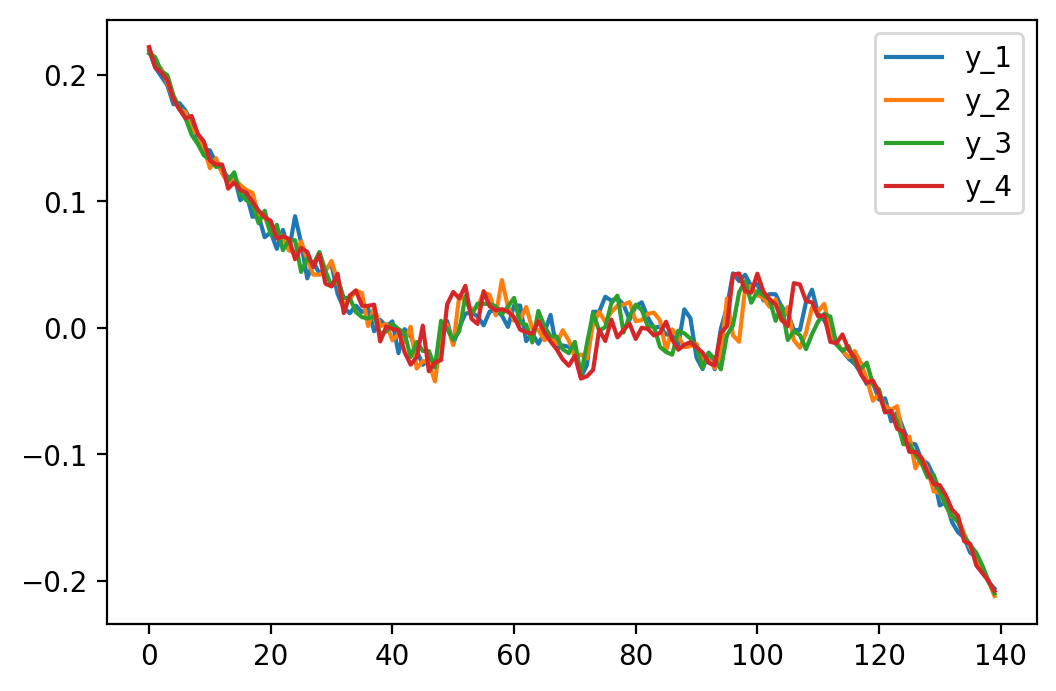

In [26]:
%matplotlib inline
plt.figure(dpi=200)
plt.plot(y_1-w_hat, label = "y_1")
plt.plot(y_2-w_hat, label = "y_2")
plt.plot(y_3-w_hat, label = "y_3")
plt.plot(y_4-w_hat, label = "y_4")
plt.legend()